####--->         ***Jamboree Admission Probability Factor Mini Project***
Jamboree has empowered thousands of students to achieve their dreams of studying at top international universities. With expertise in exams like GMAT, GRE, and SAT, Jamboree's innovative problem-solving methods ensure exceptional scores with minimal effort.

Recently, Jamboree introduced a feature allowing students to estimate their probability of admission to Ivy League colleges. Designed specifically for Indian aspirants, this feature evaluates their chances based on academic metrics and profile strengths.


In [ ]:
# Importing required libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset into a Pandas DataFrame
df = pd.read_csv("jamboree_admission.csv")

In [ ]:
# Displaying the first few and last few rows of the dataset for an overview
df.head(6)  # Viewing the first 6 rows
df.tail()   # Viewing the last 5 rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:

# Getting the dimensions of the dataset (rows and columns)
df.shape


(500, 9)

In [ ]:
# Checking the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Generating a statistical summary of numerical columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


####--->No Object Data Type: As the dataset contains no columns with object data types, there is no need to check or perform any statistical summary for object columns.

No Categorical Data Conversion: Since the dataset does not include any categorical or text data, there is no requirement to convert categorical features into continuous variables.

In [ ]:
# Checking value counts for categorical features
df['Research'].value_counts()       # Distribution of 'Research' feature
df['University Rating'].value_counts()  # Distribution of 'University Rating' feature


University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

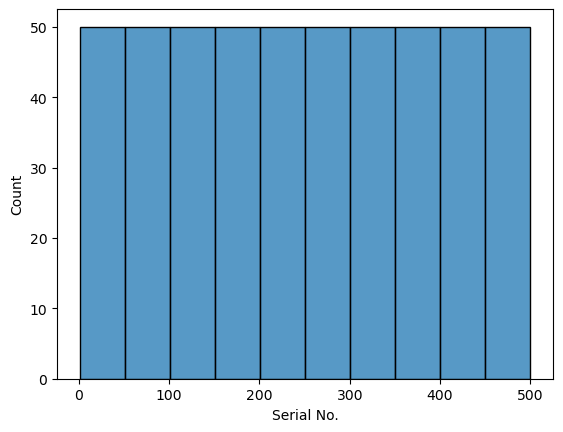

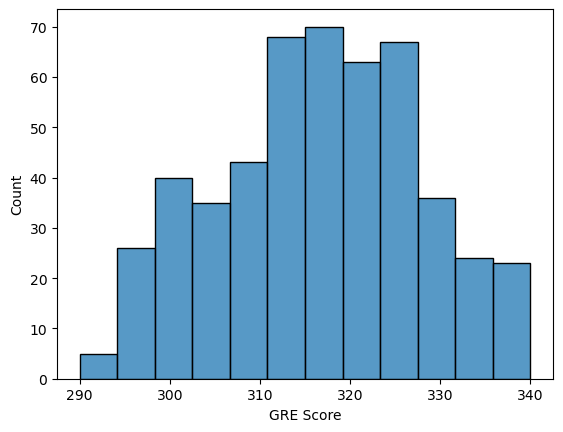

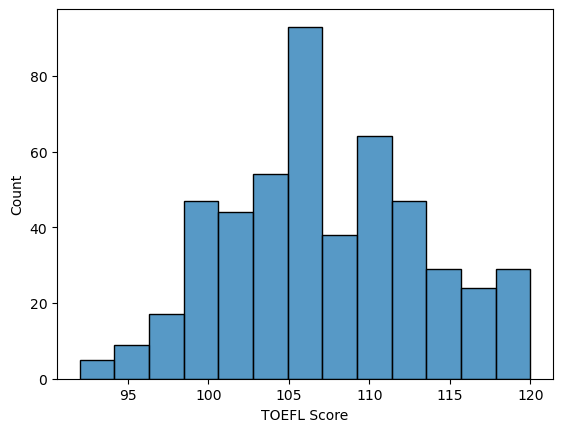

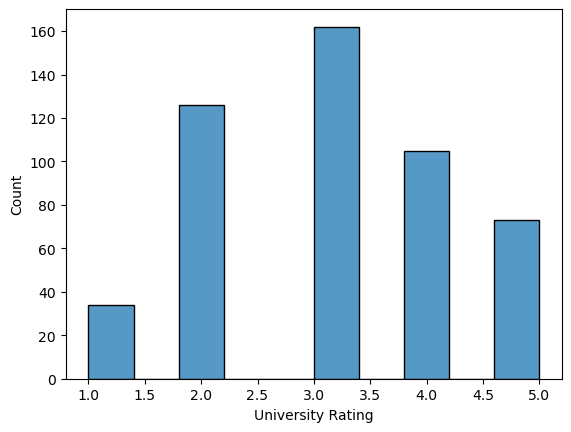

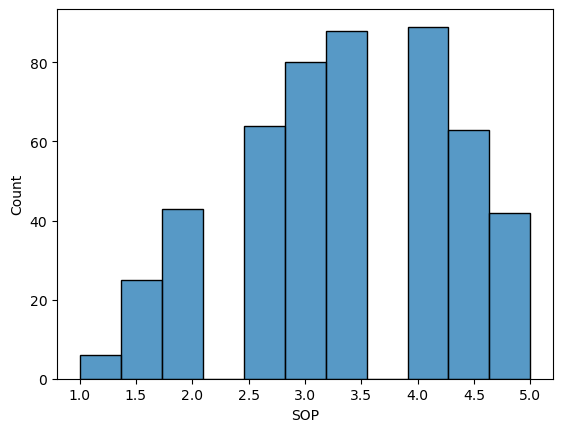

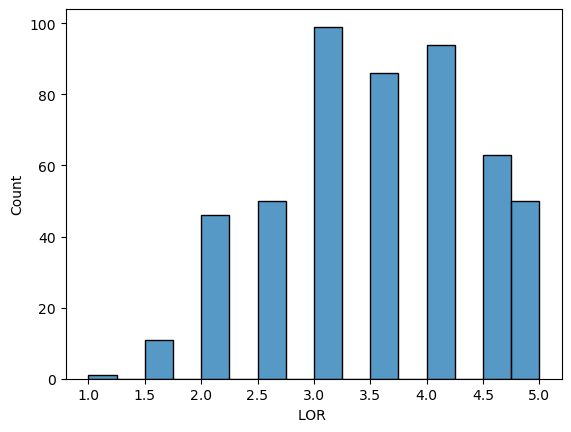

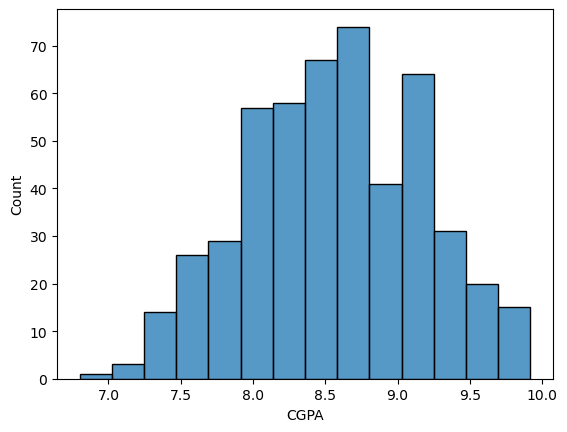

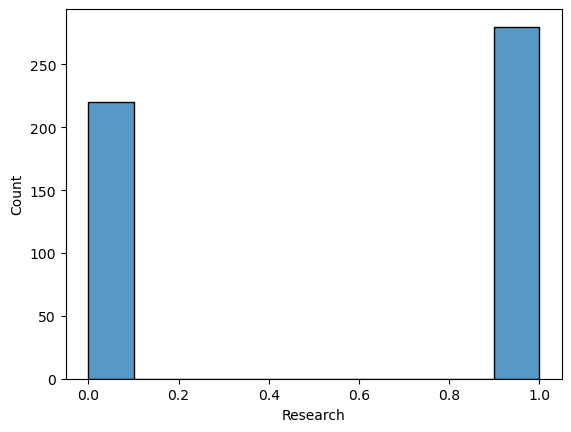

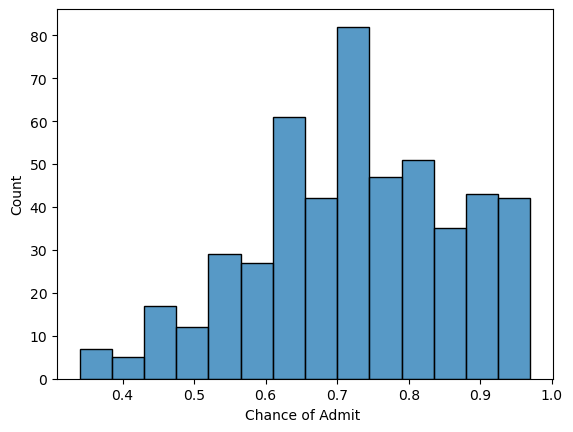

In [ ]:
# VISUALIZATION: Univariate and Bivariate Analysis
# Univariate Analysis: Histograms for continuous variables
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

<Axes: xlabel='Research', ylabel='count'>

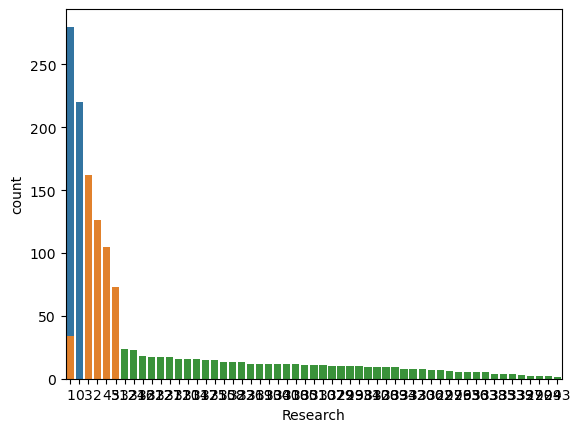

In [ ]:
# Count plots for categorical variables
sns.countplot(data=df, x="Research", order=df["Research"].value_counts().index)
sns.countplot(data=df, x="University Rating", order=df["University Rating"].value_counts().index)
sns.countplot(data=df, x="GRE Score", order=df["GRE Score"].value_counts().index)

1. **Research**: Highlights how many students have research experience, revealing its prevalence and potential impact on outcomes.  
2. **University Rating**: Shows the distribution of ratings; uneven patterns may indicate quality biases or trends.  
3. **GRE Score**: As a continuous variable, grouping scores into bins could make the plot more interpretable and less cluttered.  

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

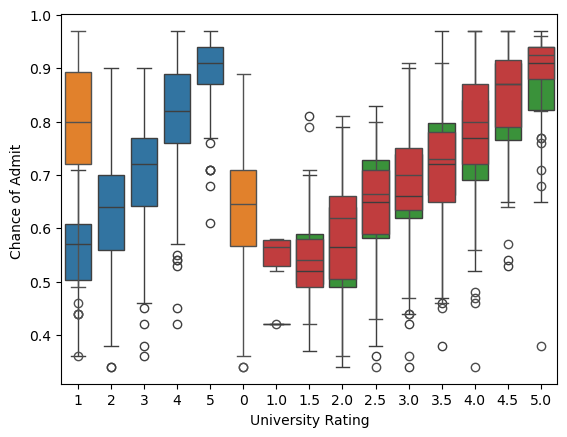

In [ ]:
# Bivariate Analysis: Analyzing 'Chance of Admit ' with respect to other variables
sns.boxplot(data=df, x="University Rating", y="Chance of Admit ")  # Based on University Rating
sns.boxplot(data=df, x="Research", y="Chance of Admit ")           # Based on Research Experience
sns.boxplot(data=df, x="LOR ", y="Chance of Admit ")               # Based on Letter of Recommendation
sns.boxplot(data=df, x="SOP", y="Chance of Admit ")                # Based on Statement of Purpose

1. **University Rating vs. Chance of Admit**: Higher university ratings may show higher medians and narrower interquartile ranges, suggesting a positive correlation with admission chances.  
2. **Research vs. Chance of Admit**: Students with research experience are likely to show higher admission probabilities, indicated by a shift in boxplot distributions.  
3. **LOR vs. Chance of Admit**: Stronger LOR ratings could align with increasing median admission chances, highlighting its influence.  
4. **SOP vs. Chance of Admit**: SOP ratings might show a similar trend, emphasizing the importance of well-articulated statements for admissions.  

In [ ]:
# Detecting potential outliers in numerical columns programmatically
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Loop through numerical columns to detect and display outliers
for column in df.select_dtypes(include="number").columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    # Printing outliers
    print(f"Outliers in column '{column}':")
    print(outliers.to_string(index=False))
    print("-" * 50)

Outliers in column 'Serial No.':
Series([], )
--------------------------------------------------
Outliers in column 'GRE Score':
Series([], )
--------------------------------------------------
Outliers in column 'TOEFL Score':
Series([], )
--------------------------------------------------
Outliers in column 'University Rating':
Series([], )
--------------------------------------------------
Outliers in column 'SOP':
Series([], )
--------------------------------------------------
Outliers in column 'LOR ':
1.0
--------------------------------------------------
Outliers in column 'CGPA':
Series([], )
--------------------------------------------------
Outliers in column 'Research':
Series([], )
--------------------------------------------------
Outliers in column 'Chance of Admit ':
0.34
0.34
--------------------------------------------------


In [ ]:
# Checking for missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Checking for duplicate rows in the dataset
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

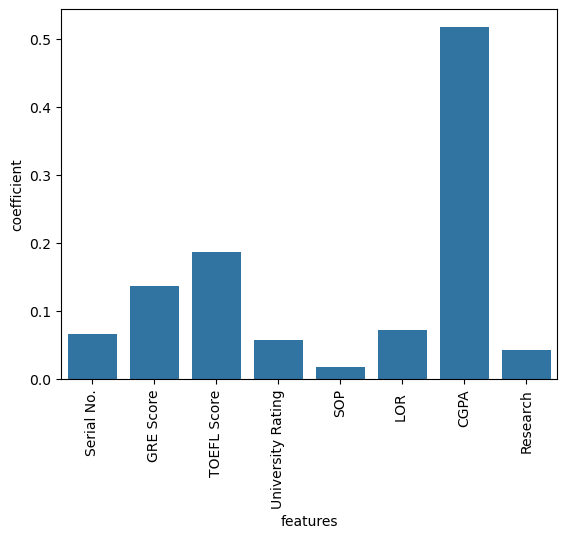

In [ ]:
# Assuming 'linear_model' is an instance of LinearRegression
imp = pd.DataFrame(
    list(zip(x_test.columns, np.abs(linear_model.coef_))),  # Access coefficients
    columns=['features', 'coefficient']
)

sns.barplot(x='features', y='coefficient', data=imp)
plt.xticks(rotation=90)
plt.show()


####---> The bar chart shows the coefficients of different features in a model. The higher the coefficient, the more important the feature is in predicting the outcome.
Here are some meaningful insights from the chart:
 * Research is the most important feature: It has the highest coefficient, indicating that it has the strongest impact on the outcome.
 * GRE Score and TOEFL Score are also important features: They have relatively high coefficients, suggesting that they are significant predictors of the outcome.
 * Other features like University Rating, SOP, LOR, and CGPA have lower coefficients: This implies that they have less impact on the outcome compared to Research, GRE Score, and TOEFL Score.
It's important to note that the specific meaning of the coefficients and the outcome being predicted would depend on the context of the model.

In [ ]:
# FEATURE SCALING: Normalizing features to a common range using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

####---> This code normalizes the features in `df` to a 0-1 range using **MinMaxScaler** and stores the scaled data in `df1`.

In [ ]:
# Splitting the dataset into dependent (y) and independent (X) variables
y = df1["Chance of Admit "]  # Target variable
x = df1.drop("Chance of Admit ", axis=1)  # Predictor variables
y.shape, x.shape

((500,), (500, 8))

####---> This code splits the dataset into the target variable `y` (Chance of Admit) and the predictor variables `x` (all other features), and then displays the shapes of both arrays.

In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((350, 8), (350,), (150, 8), (150,))

####---> This code splits the data into training and testing sets, using 70% for training and 30% for testing. It then displays the shapes of the training and testing datasets for both the predictors (`x_train`, `x_test`) and the target variable (`y_train`, `y_test`).

In [ ]:
# MODEL TRAINING: Using Linear, Lasso, and Ridge Regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error


This code imports the necessary libraries to train **Linear Regression**, **Lasso Regression**, and **Ridge Regression** models, and also imports **mean_squared_error** to evaluate model performance using MSE. These models will be used to fit the data and predict outcomes.

In [ ]:
# Initializing models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

This code sets up three regression models: **Linear Regression** (no regularization), **Lasso Regression** (L1 regularization to eliminate irrelevant features), and **Ridge Regression** (L2 regularization to reduce overfitting). These models are ready to be trained on the data.

In [ ]:
# Fitting the models to the training data
linear_model.fit(x_train, y_train)



LinearRegression()

####---> Fits a linear regression model to the training data, learning coefficients and intercept to minimize prediction errors.

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

####---> Fits a Lasso regression model to the training data, applying L1 regularization to shrink coefficients and enhance model simplicity.

In [ ]:
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

####---> Fits a Ridge regression model to the training data, applying L2 regularization to reduce overfitting and stabilize coefficients.

In [ ]:
# Extracting coefficients for each model
print("Linear Regression Coefficients:", linear_model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)

Linear Regression Coefficients: [0.06618556 0.13711785 0.18675216 0.05807279 0.01732254 0.07170414
 0.51793274 0.04221952]
Lasso Regression Coefficients: [-0.  0.  0.  0.  0.  0.  0.  0.]
Ridge Regression Coefficients: [0.06611168 0.14155684 0.18826334 0.05917909 0.01972952 0.07294
 0.50304677 0.04274814]


####---> This code extracts and prints the coefficients for each regression model:
1. **Linear Regression**: Coefficients directly fit the data without adjustments.  
2. **Lasso Regression**: Some coefficients may be zero, meaning those features are ignored by the model.  
3. **Ridge Regression**: Coefficients are slightly reduced to prevent overfitting while keeping all features.

In [ ]:
# Getting Intercept for each model.

print("Linear Regression --> ",linear_model.intercept_)
print("Lasso Regression --> ",lasso_model.intercept_)
print("Ridge Regression --> ",ridge_model.intercept_)

Linear Regression -->  0.0007985791110037832
Lasso Regression -->  0.6114285714285714
Ridge Regression -->  0.003088412771365623


####---> This code prints the intercepts (constant terms) for each model:
1. **Linear Regression**: The baseline prediction when all features are zero.  
2. **Lasso Regression**: Adjusted baseline with L1 regularization applied.  
3. **Ridge Regression**: Adjusted baseline with L2 regularization applied.

In [ ]:
# Evaluating models on the test set using scores
print("Linear Regression Score:", linear_model.score(x_test, y_test))
print("Lasso Regression Score:", lasso_model.score(x_test, y_test))
print("Ridge Regression Score:", ridge_model.score(x_test, y_test))

Linear Regression Score: 0.8239704162441339
Lasso Regression Score: -0.005939560521341258
Ridge Regression Score: 0.8231160866707913


####---> This code evaluates each model's performance on the test set:

1. **Linear Regression Score**: Returns the R² score, indicating how well the linear regression model predicts the test data.  
2. **Lasso Regression Score**: Returns the R² score for the Lasso model, which might be lower if L1 regularization removes key features.  
3. **Ridge Regression Score**: Returns the R² score for the Ridge model, which uses L2 regularization to prevent overfitting, potentially leading to a lower score than linear regression but with better generalization.

In [ ]:
# Calculating Mean Squared Error (MSE) for train and test sets
# Linear Regression
linear_train_mse = mean_squared_error(y_train, linear_model.predict(x_train))
linear_test_mse = mean_squared_error(y_test, linear_model.predict(x_test))
print("Linear Regression MSE (Train):", linear_train_mse)
print("Linear Regression MSE (Test):", linear_test_mse)

Linear Regression MSE (Train): 0.008127499429519932
Linear Regression MSE (Test): 0.009932531231791135


####---> This code calculates the **Mean Squared Error (MSE)** for both the training and test sets:
**Train MSE**: Measures how well the linear regression model fits the training data (lower is better).  
**Test MSE**: Measures how well the model generalizes to unseen data (lower is better).  

By comparing both values, you can assess if the model is overfitting (train MSE much lower than test MSE).

In [ ]:
# Lasso Regression
lasso_train_mse = mean_squared_error(y_train, lasso_model.predict(x_train))
lasso_test_mse = mean_squared_error(y_test, lasso_model.predict(x_test))
print("Lasso Regression MSE (Train):", lasso_train_mse)
print("Lasso Regression MSE (Test):", lasso_test_mse)

Lasso Regression MSE (Train): 0.04727449159558005
Lasso Regression MSE (Test): 0.056760493827160516


####---> This code calculates the **Mean Squared Error (MSE)** for the **Lasso Regression** model:

**Train MSE**: Indicates how well the Lasso model fits the training data after applying L1 regularization.  
**Test MSE**: Measures how well the Lasso model generalizes to new, unseen data.  

Comparing the train and test MSE helps identify if the Lasso model is overfitting (train MSE much lower than test MSE) or underfitting (both MSEs are high).

In [ ]:
# Ridge Regression
ridge_train_mse = mean_squared_error(y_train, ridge_model.predict(x_train))
ridge_test_mse = mean_squared_error(y_test, ridge_model.predict(x_test))
print("Ridge Regression MSE (Train):", ridge_train_mse)
print("Ridge Regression MSE (Test):", ridge_test_mse)


Ridge Regression MSE (Train): 0.008129315045629677
Ridge Regression MSE (Test): 0.009980737078719895


####---> This code calculates the **Mean Squared Error (MSE)** for the **Ridge Regression** model:

**Train MSE**: Measures how well the Ridge model fits the training data, considering L2 regularization to prevent overfitting.  
**Test MSE**: Evaluates how well the Ridge model generalizes to unseen data.  

By comparing the train and test MSE, you can assess if the Ridge model is overfitting (train MSE much lower than test MSE) or underfitting (both MSEs are high).

#####--->The code performs comprehensive data analysis and modeling on the "Jamboree Admission" dataset. It includes data exploration, such as checking column types, handling missing values, and visualizing distributions. Feature scaling is applied using MinMaxScaler to normalize the data. The dataset is split into training and testing sets for model evaluation. Three regression models—Linear, Lasso, and Ridge—are trained to predict "Chance of Admit".

Key insights:
 **Linear Regressin** performs well with an R² score of around 0.82, indicating a good fi
- **Lasso Regresson** has all coefficients shrink to zero, resulting in poor performance (negative R².
- **Ridge Regresion** shows similar performance to Linear Regression, with an R² score of 0.82### Project Summary:

1. **Data Loading and Exploration:**
   - Imported `jamboree_admission.csv` and analyzed its structure, dimensions, and data types.

2. **Descriptive Statistics:**
   - Generated summary statistics and assessed distributions of categorical and numerical variables.

3. **Univariate Analysis:**
   - Visualized distributions of continuous variables (e.g., GRE Scores, CGPA) using histograms and count plots for categorical variables.

4. **Bivariate Analysis:**
   - Explored relationships between independent variables (`SOP`, `LOR`, `Research`, etc.) and the target variable (`Chance of Admit`) using box plots.

5. **Data Cleaning:**
   - Checked and handled null values and duplicates to ensure data integrity.

6. **Feature Scaling and Splitting:**
   - Normalized features using Min-Max Scaling and split data into training and testing sets (80-20 ratio).

7. **Model Training and Evaluation:**
   - Built and evaluated `LinearRegression`, `Lasso`, and `Ridge` models using MSE and R-squared scores on training and test data.

8. **Feature Importance Visualization:**
   - Identified and visualized key features influencing `Chance of Admit` based on `LinearRegrThis project explored admission data, performed visual and statistical analysis, and built predictive models using regression techniques. Key factors influencing admission chances were identified and visualized.u need further refinement!ults.